<h1> Smart Bridge Assignment - 3</h1><br>
<h1>Name: Kuchibhatla Mohan Datta</h1><br>
<h1>Reg_No : 20MID0012</h1><br>



<h4>Build a CNN model for Bird species
Bird species classification is the process of using machine learning and computer vision techniques to identify and categorize different species of birds based on their visual characteristics. By analyzing images of birds, models can extract features and patterns to accurately classify bird species. This classification is vital for ecological research, wildlife monitoring, and conservation efforts. Advancements in deep learning and the availability of large annotated datasets have improved the accuracy of bird species classification models. Challenges include variations in lighting, pose, and background clutter. Ongoing research focuses on methods like transfer learning and data augmentation to enhance classification performance and contribute to avian biodiversity understanding and conservation.

Dataset Link: https://www.kaggle.com/datasets/akash2907/bird-species-classification</h4>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/birds_dataset.zip'

unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/birds_dataset.zip, /content/drive/MyDrive/Colab Notebooks/birds_dataset.zip.zip or /content/drive/MyDrive/Colab Notebooks/birds_dataset.zip.ZIP.


In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
import cv2 as cv

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/drive/MyDrive/BIRDS/train_data/train_data',target_size=(120, 120),class_mode='categorical',batch_size=8)
test = test_gen.flow_from_directory('/content/drive/MyDrive/BIRDS/test_data/test_data',target_size=(120, 120),class_mode='categorical',batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
print(train.class_indices)
print(test.class_indices)

{'blasti': 0, 'bonegl': 1, 'brhkyt': 2, 'cbrtsh': 3, 'cmnmyn': 4, 'gretit': 5, 'hilpig': 6, 'himbul': 7, 'himgri': 8, 'hsparo': 9, 'indvul': 10, 'jglowl': 11, 'lbicrw': 12, 'mgprob': 13, 'rebimg': 14, 'wcrsrt': 15}
{'blasti': 0, 'bonegl': 1, 'brhkyt': 2, 'cbrtsh': 3, 'cmnmyn': 4, 'gretit': 5, 'hilpig': 6, 'himbul': 7, 'himgri': 8, 'hsparo': 9, 'indvul': 10, 'jglowl': 11, 'lbicrw': 12, 'mgprob': 13, 'rebimg': 14, 'wcrsrt': 15}


In [ ]:
# CNN
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model =  Sequential([Convolution2D(20,(3,3),activation = 'relu',input_shape=(120,120,3)),MaxPooling2D(2,2),Flatten(),Dense(45,activation = 'relu'),Dense(16,activation = 'softmax')])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train,epochs = 49,validation_data=test, batch_size=10)

Epoch 1/49
19/19 [==============================] - 128s 7s/step - loss: 1.7659 - accuracy: 0.4867 - val_loss: 2.7011 - val_accuracy: 0.1529
Epoch 2/49
19/19 [==============================] - 129s 7s/step - loss: 1.6338 - accuracy: 0.5333 - val_loss: 2.8207 - val_accuracy: 0.1338
Epoch 3/49
19/19 [==============================] - 130s 7s/step - loss: 1.4189 - accuracy: 0.5933 - val_loss: 2.7950 - val_accuracy: 0.1465
Epoch 4/49
19/19 [==============================] - 109s 6s/step - loss: 1.1738 - accuracy: 0.6867 - val_loss: 2.9514 - val_accuracy: 0.1529
Epoch 5/49
19/19 [==============================] - 109s 6s/step - loss: 1.1368 - accuracy: 0.6800 - val_loss: 2.9679 - val_accuracy: 0.1529
Epoch 6/49
19/19 [==============================] - 128s 7s/step - loss: 1.0236 - accuracy: 0.7533 - val_loss: 2.8528 - val_accuracy: 0.1401
Epoch 7/49
19/19 [==============================] - 110s 6s/step - loss: 0.8899 - accuracy: 0.7333 - val_loss: 2.9291 - val_accuracy: 0.2229
Epoch 8/49
19

In [ ]:
model.save('birds.h5')

In [ ]:
model_new = tf.keras.models.load_model('/content/birds.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
output  = ['rebimg','wcrsrt','jglowl','ibicrw','mgprob','hsparo','indvul','himgri','himbul','gretit','hilpig','cbrtsh','cmnmyn','bonegl','brhkyt','blasti']
print(output)

['rebimg', 'wcrsrt', 'jglowl', 'ibicrw', 'mgprob', 'hsparo', 'indvul', 'himgri', 'himbul', 'gretit', 'hilpig', 'cbrtsh', 'cmnmyn', 'bonegl', 'brhkyt', 'blasti']


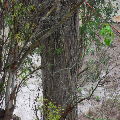

1/1 [==============================] - 0s 133ms/step
13
bonegl


In [46]:
img1 = image.load_img("/content/drive/MyDrive/BIRDS/train_data/train_data/mgprob/100_5590.JPG",target_size=(120,120))
display(img1)
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
print(output[pred])

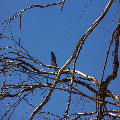

1/1 [==============================] - 0s 49ms/step
4
mgprob


In [50]:
img2 = image.load_img("/content/drive/MyDrive/BIRDS/train_data/train_data/cmnmyn/100_5763.JPG",target_size=(120,120))
display(img2)
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
print(output[pred])

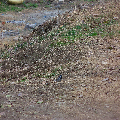

1/1 [==============================] - 0s 37ms/step
5
hsparo


In [49]:
img3 = image.load_img("/content/drive/MyDrive/BIRDS/train_data/train_data/gretit/100_5043.JPG",target_size=(120,120))
display(img3)
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
print(output[pred])

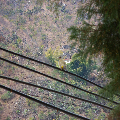

1/1 [==============================] - 0s 26ms/step
7
himgri


In [48]:
img4 = image.load_img("/content/drive/MyDrive/BIRDS/train_data/train_data/himbul/100_5029.JPG",target_size=(120,120))
display(img4)
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4,axis=0)
pred = np.argmax(model.predict(img4))
print(pred)
print(output[pred])

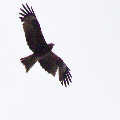

1/1 [==============================] - 0s 30ms/step
2
jglowl


In [47]:
img5 = image.load_img("/content/drive/MyDrive/BIRDS/train_data/train_data/brhkyt/D72_0401.jpg",target_size=(120,120))
display(img5)
img5 = image.img_to_array(img5)
img5 = np.expand_dims(img5,axis=0)
pred = np.argmax(model.predict(img5))
print(pred)
print(output[pred])